In [1]:
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#sigmoid funciton
def sigma(x):
    return 1/(1+np.exp(-x))

Set parameters for logistic IRT models, 5 items - 1 factor - 1 observed individual

In [3]:
beta = np.array([1,0.8,0.9,0.5,1.3])
alpha = np.array([0, 0.1, -0.1,-0.2,0.2])
print(alpha,beta)

[ 0.   0.1 -0.1 -0.2  0.2] [1.  0.8 0.9 0.5 1.3]


Define log likeihood and log prior 

In [15]:
def loglikelihood(y,alpha,beta,z):
    pis = sigma(alpha+beta*z)
    return np.sum(y*np.log(pis)+(1-y)*np.log(1-pis))
def logprior(z):
    return norm.logpdf(z)

Simulate data for the single individual

In [25]:
np.random.seed(5)
z = -2
pis = sigma(alpha+beta*z)
y = np.random.binomial(1,pis)
y

array([0, 1, 0, 1, 0])

In [26]:
pis

array([0.11920292, 0.18242552, 0.13010847, 0.23147522, 0.0831727 ])

In [29]:
loglikelihood(y, alpha, beta, z) 

-3.5178466668006667

Get posterior via MCMC - random walk Metropolis

33.01


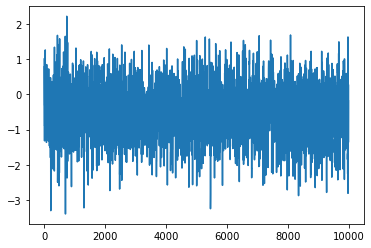

In [161]:
N = 10000
Zs = np.zeros(N)
z = 1
logPost = loglikelihood(y,alpha,beta,z) + logprior(z)
#logPost = loglikelihood(y,alpha,beta,z) 
std=2.5

for i in range(N):
    Zs[i] = z
    z1 = z+std*np.random.randn(1)
    #z1 = np.random.randn(1)
    logPost1 = loglikelihood(y,alpha,beta,z1) + logprior(z1)
    #logPost1 = loglikelihood(y,alpha,beta,z1) 
    acc = logPost1-logPost
    if acc> np.log(np.random.rand(1)):
        z = z1
        logPost = logPost1
        
accrate = 100*(N-np.sum(np.diff(Zs)==0))/N  
print(accrate)
fig, ax = plt.subplots()
ax.plot(Zs)
x = np.linspace(-3,3,1000)
estf = stats.gaussian_kde(Zs)

Get posterior by direct computation, calculate normalising constant numerically

In [162]:
lposts = np.zeros(1000)
for i in range(1000):
    lposts[i] = loglikelihood(y,alpha,beta,x[i]) + logprior(x[i])
posts = np.exp(lposts)
posts = posts/np.sum(posts*6/1000)

Get Laplace approximation

In [163]:
M = x[np.argmax(posts)] # mean at the mode
h = 0.000001  # numerical second derivative
f1 = loglikelihood(y,alpha,beta,M+h) + logprior(M+h)
f2 = loglikelihood(y,alpha,beta,M) + logprior(M)
f3 = loglikelihood(y,alpha,beta,M-h) + logprior(M-h)
V=-(h*h)/(f1-2*f2+f3) # variance being 2nd derivative evaluated at the mode.

Compare in a plot

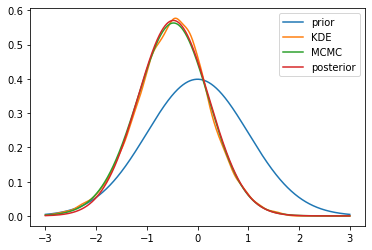

In [167]:
plt.plot(x,norm.pdf(x),label='prior')
plt.plot(x,estf(x),label='KDE')
plt.plot(x,posts,label='MCMC')
plt.plot(x,norm.pdf(x,M,np.sqrt(V)),label='posterior')
plt.legend()